# Homework 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import algo
import utils

## Initialize the problem

In [2]:
def f(x):
    return f_2d(x[0], x[1])

def fp(x):
    #   START OF YOUR CODE
    x1, x2 = x
    return np.exp(-0.1) * np.array(
        [np.exp(x1 + 3 * x2) + np.exp(x1 - 3 * x2) - np.exp(-x1),
         3 * (np.exp(x1 + 3 * x2) - np.exp(x1 - 3 * x2))]
    )
    #   END OF YOUR CODE

def fpp(x):
    #   START OF YOUR CODE
    x1, x2 = x
    return np.exp(-0.1) * np.array(
        [[np.exp(x1 + 3 * x2) + np.exp(x1 - 3 * x2) + np.exp(-x1),
          3 * (np.exp(x1 + 3 * x2) - np.exp(x1 - 3 * x2))],
         [3 * (np.exp(x1 + 3 * x2) - np.exp(x1 - 3 * x2)),
          9 * (np.exp(x1 + 3 * x2) + np.exp(x1 - 3 * x2))]]
    )
    #   END OF YOUR CODE

def f_2d(x1, x2):
    return np.exp(x1 + 3 * x2 - 0.1) + np.exp(x1 - 3 * x2 - 0.1) + np.exp(-x1 - 0.1)

In [3]:
# use the value you find in (a)
x_opt = np.array([-0.5 * np.log(2), 0])
f_opt = 2 * np.sqrt(2) * np.exp(-0.1)
v_opt = np.linalg.eigvals(fpp(x_opt))
print('eigenvalues at x_opt = {}: {}'.format(x_opt, v_opt))

def error(x):
    return f(x) - f_opt

eigenvalues at x_opt = [-0.34657359  0.        ]: [ 2.5592667  11.51670013]


## Gradient descent with backtracking line search
Part (b) and (c)

eigenvalues at x_0 = [-2.  1.]: [ 5.8385571  25.50433592]

Gradient descent with Armijo:
number of iterations in outer loop: 31
total number of iterations in inner loop: 164
solution: [-3.46574262e-01 -3.12525917e-07]
value: 2.559266696659355

eigenvalues at x_0 = [2. 1.]: [1.30673319e+00 1.34504223e+03]

Gradient descent with Armijo:
number of iterations in outer loop: 34
total number of iterations in inner loop: 220
solution: [-3.46571978e-01  6.69522936e-07]
value: 2.5592666966641238



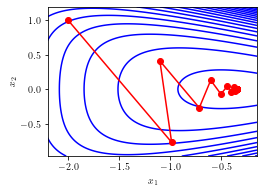

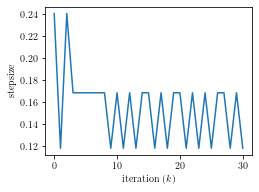

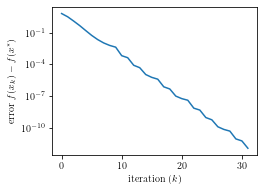

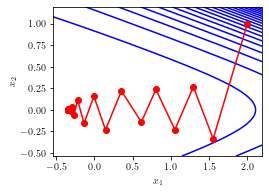

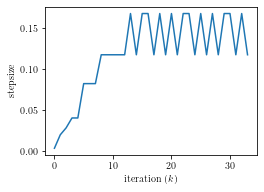

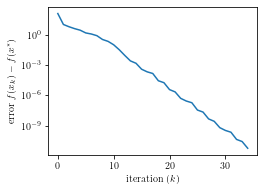

In [4]:
for x0 in [np.array([-2.0, 1.0]), np.array([2.0, 1.0])]:
    v0 = np.linalg.eigvals(fpp(x0))
    print('eigenvalues at x_0 = {}: {}'.format(x0, v0))
    print()

    x_traces_armijo, stepsize_traces, num_iter_inner = algo.gd_armijo(f, fp, x0, alpha=0.1, beta=0.7)
    f_value_armijo = f(x_traces_armijo[-1])

    print('Gradient descent with Armijo:')
    print('number of iterations in outer loop: {}'.format(len(x_traces_armijo) - 1))
    print('total number of iterations in inner loop: {}'.format(num_iter_inner))
    print('solution: {}'.format(x_traces_armijo[-1]))
    print('value: {}'.format(f_value_armijo))
    print()

    utils.plot_traces_2d(f_2d, x_traces_armijo, 'figures/gd_traces_armijo_{}.pdf'.format(x0))
    utils.plot_stepsizes(stepsize_traces, 'figures/gd_armijo_ss_{}.pdf'.format(x0))
    utils.plot(error, x_traces_armijo, 'figures/gd_error_armijo_{}.pdf'.format(x0))

## Newton's method
Part (d) and (e)

eigenvalues at x_0 = [-2.  1.]: [ 5.8385571  25.50433592]

Newton's method:
number of iterations: 5
solution: [-3.46573561e-01 -7.63119827e-09]
value: 2.559266696658217

eigenvalues at x_0 = [2. 1.]: [1.30673319e+00 1.34504223e+03]

Newton's method:
number of iterations: 9
solution: [-3.46573590e-01  6.89451244e-12]
value: 2.5592666966582156



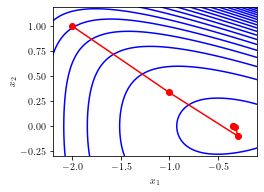

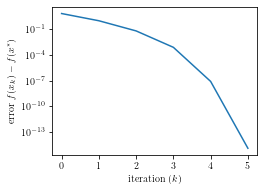

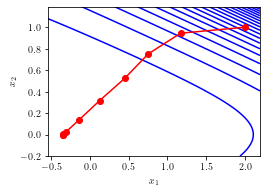

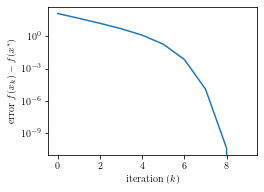

In [5]:
for x0 in [np.array([-2.0, 1.0]), np.array([2.0, 1.0])]:
    v0 = np.linalg.eigvals(fpp(x0))
    print('eigenvalues at x_0 = {}: {}'.format(x0, v0))
    print()

    x_traces = algo.newton(fp, fpp, x0)
    f_value = f(x_traces[-1])

    print('Newton\'s method:')
    print('number of iterations: {}'.format(len(x_traces) - 1))
    print('solution: {}'.format(x_traces[-1]))
    print('value: {}'.format(f_value))
    print()

    utils.plot_traces_2d(f_2d, x_traces, 'figures/nt_traces_{}.pdf'.format(x0))
    utils.plot(error, x_traces, 'figures/nt_error_{}.pdf'.format(x0))